# Adjacency Matrix Test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting, reduction
import pandas

%load_ext autoreload
%autoreload 2
%matplotlib widget

plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

#COLOR = 'white'
#plt.rcParams['text.color'] = COLOR
#plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['xtick.color'] = COLOR
#plt.rcParams['ytick.color'] = COLOR


In [2]:
dataset_path = '/home/berlukas/Documents/workspace/fgsp_ws/src/fgsp/data/mission_03/adj_test/'
graph_file = dataset_path + 'cdpgo_graph.csv'
signal_file = dataset_path + 'cdpgo_signal.csv'
adj_file = dataset_path + 'cdpgo_adj.csv'

graph_labels = ['ts', 'qw', 'qx', 'qy', 'qz', 'x', 'y', 'z']
signal_labels = ['residual']
graph_df = pandas.read_csv(graph_file, names=graph_labels, delimiter=',', header=0)
signal_df = pandas.read_csv(signal_file, names=signal_labels, delimiter=',', header=None)
#adj_df = pandas.read_csv(adj_file, delimiter=' ', header=None)
adj = np.genfromtxt(adj_file, dtype=float)


print(f'\nRead {graph_df.size} (graph) and {signal_df.size} (signal)  entries.')
print(f'\nShape of the adjacency matrix {adj.shape}')


Read 8664 (graph) and 1083 (signal)  entries.

Shape of the adjacency matrix (1083, 1083)


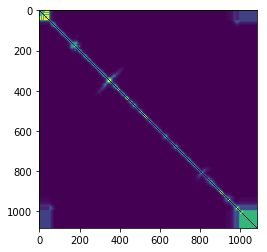

In [3]:
adj_plot = plt.imshow(adj)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1342b1e48>)

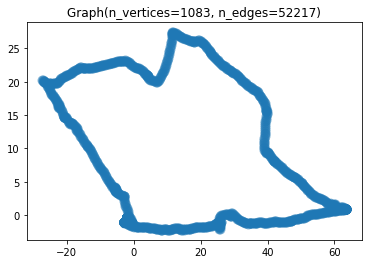

In [4]:
N = graph_df[['x', 'y']].to_numpy()
G = graphs.Graph(adj)
G.set_coordinates(N)
G.compute_fourier_basis()

G.plot()

2021-02-15 08:10:30,664:[WARNING](pygsp.graphs.graph.__init__): Adjacency: there are negative edge weights.


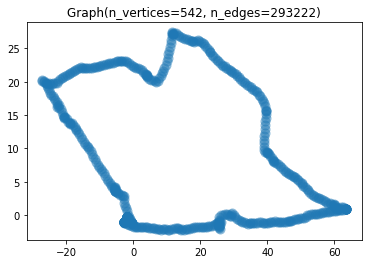

In [44]:
n_nodes = np.shape(N)[0]
ind = np.arange(0, n_nodes, 2)
Ns = N[ind]

Gs = reduction.kron_reduction(G, ind)
Gs.compute_fourier_basis()
Gs.plot()

As = Gs.W.toarray()

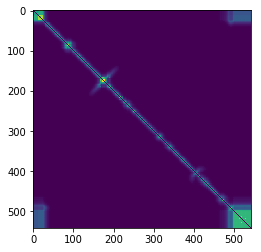

In [45]:
adj_plot = plt.imshow(As)
#Gs.W.toarray().shape

In [65]:
Gs = G
Ns = N

In [51]:

origin = Ns[0,:]
pos_signal = (Ns - origin).squeeze()

x = np.linalg.norm(pos_signal, ord=2, axis=1)
x_hat = Gs.gft(x).squeeze()


print(f'$x^T L x = {Gs.dirichlet_energy(x)}$')
Gs.plot(x)

$x^T L x = 53086.27008977678$


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

(<Figure size 1000x500 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9a5e0d5588>)

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

axes.plot(Gs.e, np.abs(x_hat), '.-')
axes.set_xticks(range(0, 300, 20))
axes.set_xlabel(r'graph frequency $\lambda$')
axes.set_ylim(-0.05, 55)
axes.set_ylabel(r'frequency content $\hat{x}(\lambda)$')
axes.grid()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [53]:
Gs.is_connected()

True

# Robot Graph Building

loaded adj with shape (1946, 1946)


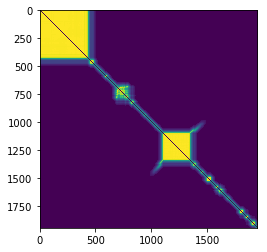

In [6]:
adj = np.load('/home/berlukas/Documents/workspace/fgsp_ws/src/fgsp/data/cerberus_est_graph_adj.npy')
print(f'loaded adj with shape {adj.shape}')
adj_plot = plt.imshow(adj)

In [16]:
opt_traj = np.load('/home/berlukas/Documents/workspace/fgsp_ws/src/fgsp/data/cerberus_opt_trajectory.npy')
est_traj = np.load('/home/berlukas/Documents/workspace/fgsp_ws/src/fgsp/data/cerberus_est_trajectory.npy')
raw_est_traj = np.load('/home/berlukas/Documents/workspace/fgsp_ws/src/fgsp/data/cerberus_est_raw_trajectory.npy')
print(f'loaded traj with shape {opt_traj.shape} and shape {est_traj.shape}')
print(f'loaded traj with shape {raw_est_traj.shape}')

print(opt_traj[30:40, :])
print('-----------------------------------------')
print(est_traj[30:40, :])
print('-----------------------------------------')
print(raw_est_traj[30:40, :])

loaded traj with shape (86, 8) and shape (86, 8)
loaded traj with shape (933, 8)
[[ 1.60526777e+18 -2.82540826e+00 -1.05156828e+00  5.82713389e-01
   5.57202155e-01  4.95852635e-03  6.06494348e-03  8.30339923e-01]
 [ 1.60526777e+18 -2.82142443e+00 -1.05059840e+00  5.80087063e-01
   5.57028237e-01  4.58366876e-03  5.63481562e-03  8.30461788e-01]
 [ 1.60526778e+18 -2.78337356e+00 -1.06676580e+00  5.82815178e-01
   5.57154710e-01  4.53830621e-03  5.47833093e-03  8.30378239e-01]
 [ 1.60526778e+18 -2.82185413e+00 -1.05007726e+00  5.72605049e-01
   5.56274400e-01  5.94831842e-03  6.05006106e-03  8.30955357e-01]
 [ 1.60526778e+18 -2.82185413e+00 -1.05007726e+00  5.72605049e-01
   5.56274400e-01  5.94831842e-03  6.05006106e-03  8.30955357e-01]
 [ 1.60526778e+18 -2.80431656e+00 -1.09329311e+00  6.00403569e-01
   6.73200081e-01 -1.18292449e-02 -7.91409857e-03  7.39323398e-01]
 [ 1.60526778e+18 -2.30394670e+00 -1.08060101e+00  6.11122024e-01
   7.55516802e-01 -2.61408064e-02  2.94501316e-03  6.54